<a href="https://colab.research.google.com/github/TimSim/FraudDetection/blob/main/CreditCardFraudDetectionTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to identify fraudulent credit card transactions using ML or Deep Learning models. Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. We recommend using the TensorFlow tf.keras.metrics.AUC(curve='PR') as our performance and scoring metric.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
#import seaborn as sns
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['agg.path.chunksize'] = 10000

pd.set_option('display.max_columns', None)

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls -la "/content/drive/My Drive/Colab Notebooks/data"

total 157245
-rw------- 1 root root 150828752 Sep 19  2019 creditcard.csv
-rw------- 1 root root  10188854 May  6  2019 Shakespeare_data.csv


Credit Card data from https://www.kaggle.com/mlg-ulb/creditcardfraud


In [7]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/creditcard.csv')
(tv_df,test_df) = train_test_split(df, stratify=df['Class'], test_size=0.2, random_state=51)

In [8]:
# split the training data into training and validation:
train_df, val_df = train_test_split(tv_df, stratify=tv_df['Class'], test_size=0.2, random_state=51)

In [9]:
# Verify stratification:
print((test_df.shape,df.shape,len(test_df)/len(df)))
print((test_df.Class.sum(),df.Class.sum(),test_df.Class.sum()/df.Class.sum()))

((56962, 31), (284807, 31), 0.20000210668979343)
(98, 492, 0.1991869918699187)


In [10]:

# separate class from features:
(X_train,X_val,X_test,X_tv) = [DF.drop('Class',axis=1,inplace=False) for DF in [train_df,val_df,test_df,tv_df]]
(y_train,y_val,y_test,y_tv) = [DF['Class'] for DF in [train_df,val_df,test_df,tv_df]]

In [11]:
tv_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94834.244666,-0.000429,-0.001766,-0.001021,0.000414,-0.000731,0.001989,0.001310,-0.001327,-0.000376,0.001597,0.000143,0.000581,0.000103,-0.001121,-0.000030,-0.000144,-0.000657,-0.000136,0.000653,0.000517,0.000100,0.000326,0.000070,0.001336,0.000473,-0.000161,0.000165,-0.000059,88.771219,0.001729
std,47476.822552,1.967426,1.662720,1.521840,1.416733,1.385033,1.334890,1.247306,1.195472,1.099686,1.090792,1.019617,0.996069,0.994237,0.958634,0.915960,0.876402,0.848492,0.838721,0.814122,0.778989,0.740174,0.726675,0.625204,0.605842,0.521631,0.481928,0.404762,0.331608,253.068313,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.688419,-13.434066,-24.588262,-4.797473,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-7.213527,-54.497720,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54246.000000,-0.919893,-0.599011,-0.890786,-0.847792,-0.691670,-0.766960,-0.553506,-0.208716,-0.644858,-0.533726,-0.761618,-0.405820,-0.647725,-0.427788,-0.582582,-0.467742,-0.484224,-0.499053,-0.454887,-0.211660,-0.228192,-0.542369,-0.161836,-0.354038,-0.316550,-0.327156,-0.070900,-0.052907,5.700000,0.000000
50%,84691.000000,0.018846,0.063994,0.180546,-0.019239,-0.055925,-0.272083,0.041010,0.021875,-0.050596,-0.092371,-0.032355,0.139424,-0.013170,0.049538,0.047587,0.066979,-0.065487,-0.003826,0.004441,-0.062241,-0.029092,0.006740,-0.011021,0.042253,0.017417,-0.051862,0.001194,0.011292,22.060000,0.000000
75%,139340.000000,1.315404,0.802516,1.027751,0.743302,0.612093,0.399907,0.570426,0.325719,0.597298,0.454159,0.739493,0.618366,0.661789,0.492063,0.649629,0.521739,0.400064,0.501636,0.458616,0.134009,0.186476,0.529748,0.147667,0.441007,0.350871,0.240447,0.090606,0.078413,77.750000,0.000000
max,172788.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,4.846452,7.126883,7.754599,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,8.361985,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000



The V_n resemble PCA output.

Stds are decreasing steadily with each V_n

Means are very close to zero, but not exactly zero. They should be exactly zero for PCA. Perhaps they were exactly zero before we carved out a test set? (Verified: yes the features V1 thru V28 are the result of a PCA, run over all 284807 samples of original dataset)

Most PCs do include some extreme outliers.

In [12]:
tv_df[tv_df.Class==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,81398.664975,-4.844204,3.702045,-7.103359,4.513672,-3.215601,-1.377679,-5.697448,0.294716,-2.582508,-5.728446,3.757555,-6.193830,-0.145069,-6.954490,-0.059050,-4.140517,-6.611233,-2.238158,0.663064,0.405860,0.743573,-0.001732,-0.011422,-0.091423,0.044757,0.040487,0.148092,0.082279,123.427056,1.0
std,48070.059166,6.905678,4.401831,7.129159,2.825324,5.377178,1.910775,7.454604,7.314756,2.567686,4.926100,2.626405,4.520800,1.128695,4.162451,1.067186,3.822012,6.935905,2.888515,1.565038,1.435602,4.276761,1.615337,1.511172,0.513911,0.788806,0.473072,1.428180,0.538650,265.931222,0.0
min,406.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.552593,0.000000,1.0
25%,41234.000000,-6.185857,1.218545,-8.586704,2.400206,-4.801176,-2.484426,-7.903402,-0.230744,-3.877669,-7.520666,2.061138,-8.654537,-1.016123,-9.398537,-0.598972,-6.551650,-12.072373,-4.629082,-0.383447,-0.171591,0.098377,-0.541855,-0.344701,-0.415312,-0.312004,-0.263161,-0.017603,-0.104948,1.000000,1.0
50%,74921.500000,-2.352844,2.720177,-5.075257,4.187495,-1.621234,-1.431912,-3.044264,0.568659,-2.133707,-4.556094,3.586609,-5.434170,-0.117313,-6.789141,-0.034679,-3.626171,-5.287250,-1.695375,0.600661,0.304766,0.602709,0.038201,-0.068174,-0.031239,0.082519,-0.006489,0.404371,0.150454,9.170000,1.0
75%,128576.000000,-0.357602,4.950132,-2.476831,6.245229,0.201776,-0.450849,-0.981932,1.706456,-0.777500,-2.743685,5.205445,-3.013519,0.678863,-4.347369,0.666365,-1.253042,-1.322019,0.058868,1.662803,0.820768,1.319726,0.623456,0.307290,0.283599,0.457364,0.399143,0.828718,0.382448,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,6.198304,6.474115,5.431271,20.007208,3.353525,3.245086,12.018913,1.237773,2.815440,1.571080,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.773326,2125.870000,1.0


Descriptive stats for the fraud points look very different than for the legit transactions. Many of the PCs have fraud means multiple stdevs away from legit means.

Let's see which PC fraud means are the most legit stdevs away from the legit means

In [13]:
tv0 = tv_df[tv_df.Class==0]
tv1 = tv_df[tv_df.Class==1]

In [14]:
describe_tv0 = tv0.describe()
describe_tv1 = tv1.describe()
relative_zBAR = (describe_tv1.loc['mean'] - describe_tv0.loc['mean']) / describe_tv0.loc['std']
print(relative_zBAR.sort_values())

V17      -8.831453
V14      -7.754993
V12      -6.570144
V10      -5.490377
V16      -4.906965
V3       -4.858184
V7       -4.814204
V18      -2.715582
V1       -2.504193
V9       -2.372691
V5       -2.365321
V6       -1.037235
Time     -0.283508
V24      -0.153340
V13      -0.146305
V15      -0.064568
V23      -0.018492
V22      -0.002847
V26       0.084488
V25       0.085139
Amount    0.137194
V28       0.249094
V8        0.256279
V27       0.369817
V20       0.522450
V19       0.817435
V21       1.036548
V2        2.252911
V4        3.228128
V11       3.754541
Class          inf
dtype: float64



Strongly separated features include V17, V14, V12, V10 (Class of course gives inf)

The only two interpretable features (Time and Amount) fail to stand out on summary stats alone.


# **Exploration: Univariate**
Let's view each data field as a time series. See if and how class differences present themselves visually.

In [15]:

# Amount column will be easiest to view on a log scale:
def seriesTransform(df0,colName,myFloor=0.001):
    if (colName=='Amount'):
        return(np.log10(df0[colName].apply(lambda x: max(x,myFloor))))
    else:
        return(df0[colName])

In [16]:
def plotImbalancedSeries(X,y,field,options=None):
    if (options is None):
        options = {'colors':[[0,0,0],[1,0,0]]}
    plt.plot(seriesTransform(X[y==0],field),'.',color=options['colors'][0])
    plt.plot(seriesTransform(X[y==1],field),'.',color=options['colors'][1])
    plt.ylabel(field)
    plt.xlabel('index')
    plt.show()

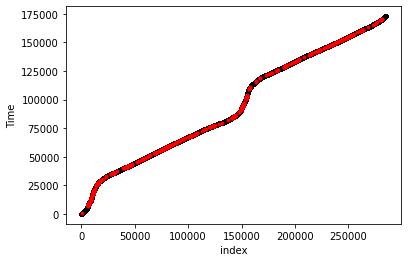

In [17]:
plotImbalancedSeries(X_tv,y_tv,'Time')

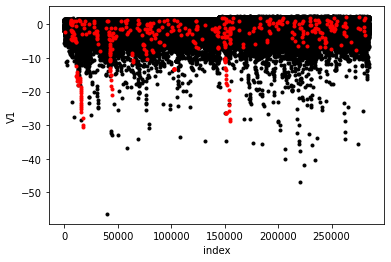

In [18]:
plotImbalancedSeries(X_tv,y_tv,'V1')

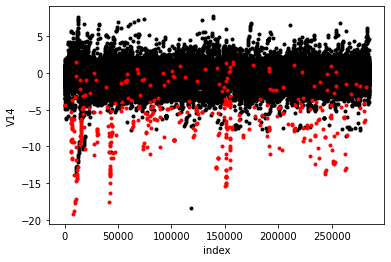

In [19]:
plotImbalancedSeries(X_tv,y_tv,'V14')

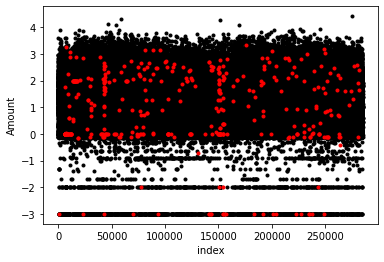

In [20]:
plotImbalancedSeries(X_tv,y_tv,'Amount')